In [1]:
import pandas as pd
import seaborn as sns
import utils
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

In [2]:
# LOAD DATA
conn = utils.get_conn()
df = utils.get_data(conn, table_name='parsed_feelings')

Number of subreddits: 13559 (283224 submissions).
Number of subreddits with >10 submissions: 1973 (257774 submissions).
Number of subreddits with >1 submissions: 6628 (276293 submissions).


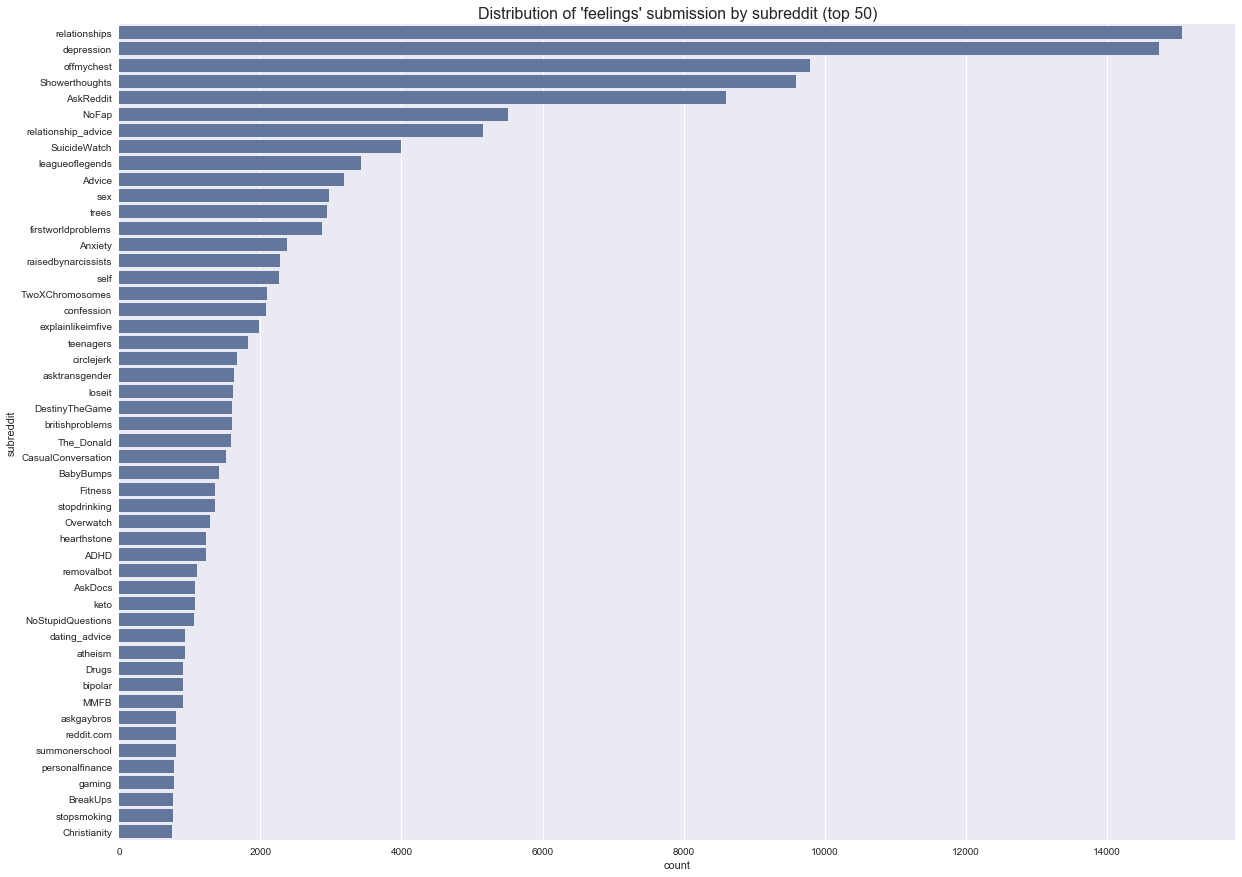

In [20]:
# bin data by subreddit to get a sense of how
# the feelings are distributed
n = 50
counts_by_subreddit = df['subreddit'].value_counts()
top_subreddit = counts_by_subreddit.index.tolist()[:n]
df_subset = df[df.subreddit.isin(top_subreddit)]

plt.figure(figsize=(20,15))
plt.title("Distribution of 'feelings' submission by subreddit (top %s)" %n, fontsize=16)
ax = sns.countplot(y="subreddit", data=df_subset, order=top_subreddit, color='#5975A4')
plt.savefig('../img/distribution_by_subreddit.svg')

print("Number of subreddits: %s (%s submissions)." %(len(df.subreddit.unique()),df.shape[0]))
tmp = counts_by_subreddit[counts_by_subreddit > 10].index.tolist()
tmp = df[df.subreddit.isin(tmp)]
print("Number of subreddits with >10 submissions: %s (%s submissions)." %(len(tmp.subreddit.unique()), tmp.shape[0]))
tmp = counts_by_subreddit[counts_by_subreddit > 1].index.tolist()
tmp = df[df.subreddit.isin(tmp)]
print("Number of subreddits with >1 submissions: %s (%s submissions)." %(len(tmp.subreddit.unique()), tmp.shape[0]))